In [1]:
# Libraries for metrics
import time                        # To track solve times
import pandas as pd                # To store data to plot
import matplotlib.pyplot as plt    # Plot backend
import seaborn as sns              # Plot frontend

In [2]:
# Backtracking Algorithm

# Function to print the board
def print_board(bo):
    
    # print horizontal lines
    for i in range(len(bo)):
        if i % 3 == 0 and i != 0:
            print('------------------------')      #Delimit each rank within a grid
        
        # print vertical lines
        for j in range(len(bo[0])):
            if j % 3 == 0 and j != 0:
                print(" | ", end = "")             #Delimit each stack within a grid
            
            # if at the last position, print the last number
            if j == 8:
                print(bo[i][j])
            else:
                print(str(bo[i][j]) + " ", end="")
                
                                

# Function to find an empty cell (In this problemset 0 indicates empty)
def find_empty(bo):
    for i in range(len(bo)):
        for j in range(len(bo[0])):
            if bo[i][j] == 0:
                return (i,j)         #returns the row and column
    return None



# Function to check if board is valid, if not valid then need to backtrack
def valid(bo, num, pos):
    # Check row
    for i in range(len(bo[0])):
        if bo[pos[0]][i] == num and pos[1] != i:
            return False
    
    # Check column
    for i in range(len(bo)):
        if bo[i][pos[1]] == num and pos[0] != i:
            return False
    
    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3
    
    for i in range(box_y*3,box_y*3 + 3):
        for j in range(box_x*3,box_x*3 + 3):
            if bo[i][j] == num and (i,j) != pos:   # Found a duplicate
                return False
    return True


# Solve function, recursion
def solve(bo):
    # Calls function to iterate through each row-column to find a 0
    find = find_empty(bo)
    if not find:
        return True
    else:
        row, col = find
        
    # Check numbers, loop through 1-9
    for i in range(1,10):
        if valid(bo, i, (row,col)):    # Check if by adding into the board it would be a valid solution
            bo[row][col] = i           # If valid, update the board cell with this value
            
            if solve(bo):              # Recursivly try to finish the solution by calling solve on the new board
                return True
            
            bo[row][col] = 0           # Backtrack,
                                       #if can't finish solution based on whatever value we just added, we need to reset that value and try a different value, then repeat that process again recursively
    return False                       # If we loop through all numbers, and none are valid, return false -> backtrack

In [3]:
# Grabs the next 81 characters from the string and load into board
def load_board(bo):
    for v in range(0,9):                       #Do this for 9 rows, the # of rows in a sudoku puzzle
        global s
        if data[s] == 'G':                     #If a character starts with a 'G', expect a 'Grid ## ', this is the start of the puzzle
            print('grid '+str(grid))
            s += 7                             # skip the string 'Grid ##'
        row_list=[]                            #temporary list to store a row, initialized and reset here
        while len(row_list)<9:                 #Do this for 9 items in each row
            row_list.append(int(data[s]))
            #print(row_list)
            s += 1
        bo.append(row_list)

In [4]:
# Variable to keep track of the final answer
answer = 0

# Read the file

#with open('sample_data.txt','r') as file:     # Grid 1
#with open('sample_data5.txt','r') as file:   # Grid 1-5
with open('p096_sudoku.txt','r') as file:     #Project Euler 96, Grid 1-50
    data = file.read().replace('\n','')

# Variables outside the loop
s = 0                               # Iterator for the giant string containing 50 grids 
grid= 0                             # Variable to track which grid we are on
list_each_grid = []                 # List to track results from each grid
list_unsolved = []                  # List (temporarily seperate than list_each_grid) to track each puzzle (Does not work like i expect)

#Each iteration through this while statement solves a board
while s < len(data):                # Go through each character in the string
    grid += 1
    # Reset and load the board
    board=[]
    load_board(board)


                             
    # I have a question on this, I cannot store the unsolved grid, even before the solve function is called
    list_unsolved.append(board)                
    
    
    #--------------------------------------------------------------------------
    # Function to solve the board and calculate duration
    duration = 0                    # Varaible to track duration of each grid    
    start = time.time()
    
    #Calls the solve function that uses the backtracking algorithm
    solve(board)
    
    stop = time.time()
    duration = stop - start
    print(duration)
    #--------------------------------------------------------------------------
    
    
    # Pass the results of each grid into a tuple to make plots later
    list_each_grid.append((grid,duration,board))
    
    print_board(board)

    #Adjust final answer
    num3=''                            # Variable (string) to concat the 3 digit number on the top left grid
    for z in range(0,3):
        num3 = num3+str(board[0][z])   # Positions 1,2,3
    answer += int(num3)                # Cast to int and add to cumulative sum
    
    print(' '+str(answer))
    print(' ')    

answer

grid 1
0.0039865970611572266
4 8 3  | 9 2 1  | 6 5 7
9 6 7  | 3 4 5  | 8 2 1
2 5 1  | 8 7 6  | 4 9 3
------------------------
5 4 8  | 1 3 2  | 9 7 6
7 2 9  | 5 6 4  | 1 3 8
1 3 6  | 7 9 8  | 2 4 5
------------------------
3 7 2  | 6 8 9  | 5 1 4
8 1 4  | 2 5 3  | 7 6 9
6 9 5  | 4 1 7  | 3 8 2
 483
 
grid 2
0.006017923355102539
2 4 5  | 9 8 1  | 3 7 6
1 6 9  | 2 7 3  | 5 8 4
8 3 7  | 5 6 4  | 2 1 9
------------------------
9 7 6  | 1 2 5  | 4 3 8
5 1 3  | 4 9 8  | 6 2 7
4 8 2  | 7 3 6  | 9 5 1
------------------------
3 9 1  | 6 5 7  | 8 4 2
7 2 8  | 3 4 9  | 1 6 5
6 5 4  | 8 1 2  | 7 9 3
 728
 
grid 3
0.4248669147491455
4 6 2  | 8 3 1  | 9 5 7
7 9 5  | 4 2 6  | 1 8 3
3 8 1  | 7 9 5  | 4 2 6
------------------------
1 7 3  | 9 8 4  | 2 6 5
6 5 9  | 3 1 2  | 7 4 8
2 4 8  | 5 6 7  | 3 1 9
------------------------
9 2 6  | 1 7 8  | 5 3 4
8 3 4  | 2 5 9  | 6 7 1
5 1 7  | 6 4 3  | 8 9 2
 1190
 
grid 4
0.038895606994628906
1 3 7  | 2 5 6  | 8 4 9
9 2 8  | 3 1 4  | 5 6 7
4 6 5  | 8 9 7  | 3 1

0.27725887298583984
2 3 5  | 7 6 1  | 4 8 9
4 1 9  | 3 2 8  | 5 7 6
8 6 7  | 5 4 9  | 2 1 3
------------------------
7 4 6  | 1 3 5  | 9 2 8
5 2 1  | 8 9 6  | 7 3 4
9 8 3  | 4 7 2  | 6 5 1
------------------------
3 9 4  | 2 8 7  | 1 6 5
6 5 2  | 9 1 3  | 8 4 7
1 7 8  | 6 5 4  | 3 9 2
 14167
 
grid 30
0.676194429397583
2 9 8  | 1 7 5  | 6 4 3
6 5 7  | 3 9 4  | 1 2 8
1 3 4  | 2 8 6  | 5 7 9
------------------------
8 2 1  | 6 4 9  | 7 3 5
5 7 3  | 8 2 1  | 4 9 6
4 6 9  | 7 5 3  | 2 8 1
------------------------
3 1 2  | 4 6 8  | 9 5 7
7 8 5  | 9 1 2  | 3 6 4
9 4 6  | 5 3 7  | 8 1 2
 14465
 
grid 31
0.9494931697845459
7 6 1  | 5 4 3  | 2 8 9
8 3 2  | 7 9 1  | 6 4 5
5 4 9  | 6 2 8  | 1 3 7
------------------------
3 7 4  | 2 1 5  | 9 6 8
1 2 8  | 9 3 6  | 5 7 4
6 9 5  | 4 8 7  | 3 2 1
------------------------
4 1 7  | 3 6 9  | 8 5 2
9 5 3  | 8 7 2  | 4 1 6
2 8 6  | 1 5 4  | 7 9 3
 15226
 
grid 32
0.5316109657287598
1 3 2  | 6 4 9  | 7 8 5
7 5 8  | 2 1 3  | 6 4 9
9 6 4  | 7 8 5  | 1 2 3
---

24702

In [5]:
# List of tuples that contain grid # and solve time (seconds)
list_each_grid[0:2]

[(1,
  0.0039865970611572266,
  [[4, 8, 3, 9, 2, 1, 6, 5, 7],
   [9, 6, 7, 3, 4, 5, 8, 2, 1],
   [2, 5, 1, 8, 7, 6, 4, 9, 3],
   [5, 4, 8, 1, 3, 2, 9, 7, 6],
   [7, 2, 9, 5, 6, 4, 1, 3, 8],
   [1, 3, 6, 7, 9, 8, 2, 4, 5],
   [3, 7, 2, 6, 8, 9, 5, 1, 4],
   [8, 1, 4, 2, 5, 3, 7, 6, 9],
   [6, 9, 5, 4, 1, 7, 3, 8, 2]]),
 (2,
  0.006017923355102539,
  [[2, 4, 5, 9, 8, 1, 3, 7, 6],
   [1, 6, 9, 2, 7, 3, 5, 8, 4],
   [8, 3, 7, 5, 6, 4, 2, 1, 9],
   [9, 7, 6, 1, 2, 5, 4, 3, 8],
   [5, 1, 3, 4, 9, 8, 6, 2, 7],
   [4, 8, 2, 7, 3, 6, 9, 5, 1],
   [3, 9, 1, 6, 5, 7, 8, 4, 2],
   [7, 2, 8, 3, 4, 9, 1, 6, 5],
   [6, 5, 4, 8, 1, 2, 7, 9, 3]])]

In [6]:
# Insert tuples into dataframe
df = pd.DataFrame(list_each_grid, columns=['grid','duration','board'])
print(str(df.duration.sum())+' seconds')
df.head()

23.721336364746094 seconds


,grid,duration,board
0,1,0.003987,"[[4, 8, 3, 9, 2, 1, 6, 5, 7], [9, 6, 7, 3, 4, ..."
1,2,0.006018,"[[2, 4, 5, 9, 8, 1, 3, 7, 6], [1, 6, 9, 2, 7, ..."
2,3,0.424867,"[[4, 6, 2, 8, 3, 1, 9, 5, 7], [7, 9, 5, 4, 2, ..."
3,4,0.038896,"[[1, 3, 7, 2, 5, 6, 8, 4, 9], [9, 2, 8, 3, 1, ..."
4,5,0.001996,"[[5, 2, 3, 8, 1, 6, 7, 4, 9], [7, 8, 4, 5, 9, ..."


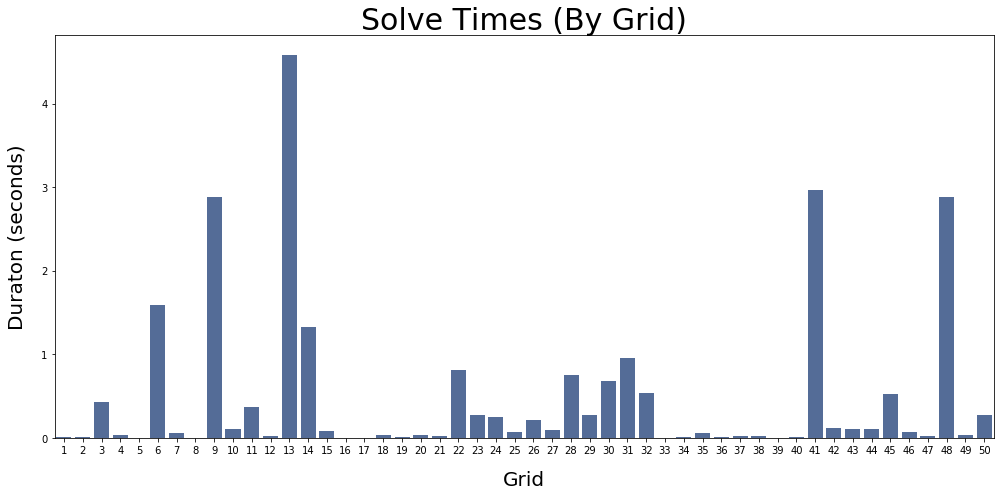

In [7]:
# Barplot by grid
f, ax = plt.subplots(figsize=(14, 7))
ax = sns.barplot(data=df,x='grid',y='duration',color='#3363B8',saturation = .5)
ax.set_title('Solve Times (By Grid)',fontsize=30)
ax.set_xlabel('Grid',fontsize=20,labelpad=15)
ax.set_ylabel('Duraton (seconds)',fontsize=20,labelpad=15)
plt.tight_layout()
plt.savefig('grid_times'+'.png')

In [8]:
# Sort dataframe by duration
df1 = df.sort_values(by='duration',ascending=False)
df1[0:5]

,grid,duration,board
12,13,4.585789,"[[3, 9, 7, 6, 8, 1, 5, 2, 4], [6, 4, 5, 2, 7, ..."
40,41,2.970073,"[[8, 1, 4, 9, 7, 6, 5, 3, 2], [6, 5, 9, 1, 2, ..."
8,9,2.886297,"[[8, 1, 4, 9, 7, 6, 5, 3, 2], [6, 5, 9, 1, 2, ..."
47,48,2.881336,"[[8, 6, 1, 3, 5, 7, 2, 9, 4], [5, 9, 7, 4, 8, ..."
5,6,1.589756,"[[1, 7, 6, 9, 2, 3, 5, 8, 4], [5, 2, 4, 8, 1, ..."


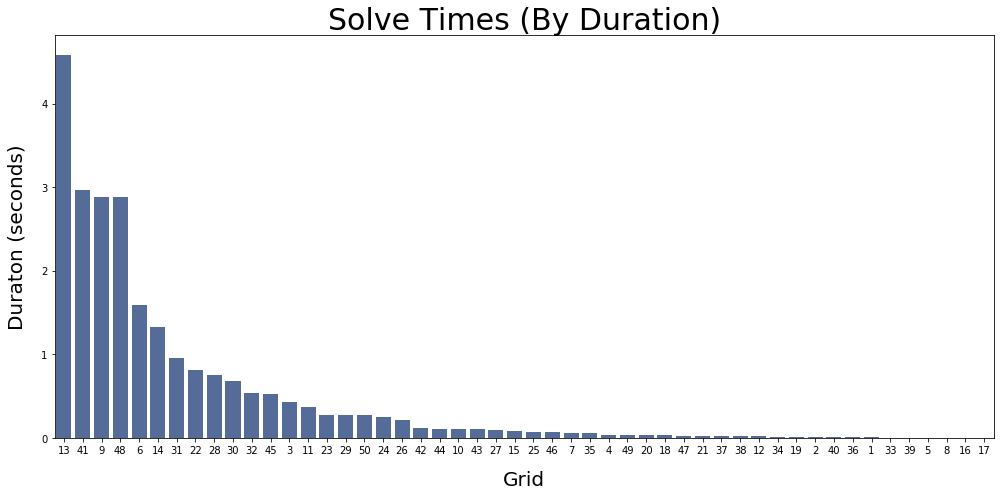

In [9]:
# Barplot by duration
f, ax = plt.subplots(figsize=(14, 7))
ax = sns.barplot(data=df1,x='grid',y='duration',color='#3363B8',saturation = .5, order = df1.grid)
ax.set_title('Solve Times (By Duration)',fontsize=30)
ax.set_xlabel('Grid',fontsize=20,labelpad=15)
ax.set_ylabel('Duraton (seconds)',fontsize=20,labelpad=15)
plt.tight_layout()
plt.savefig('grid_times_sorted'+'.png')

In [14]:
# Grid 13 took the longest because the first 10 solved digits were, in order, 9 7 6 8 1 5 2 4 6 4 ...
# This exhausted almost all of the combinations in the 'brute force'
# I currently cannot figure out an easy way to print the unsolved grids for comparison
show_grid = 13
print_board(df.board[show_grid-1])

3 9 7  | 6 8 1  | 5 2 4
6 4 5  | 2 7 9  | 8 1 3
2 1 8  | 5 3 4  | 9 7 6
------------------------
8 2 3  | 9 5 6  | 7 4 1
1 6 9  | 7 4 2  | 3 5 8
7 5 4  | 3 1 8  | 6 9 2
------------------------
4 7 2  | 8 9 3  | 1 6 5
5 3 1  | 4 6 7  | 2 8 9
9 8 6  | 1 2 5  | 4 3 7


In [11]:
print(str(df.duration.sum())+' seconds')
answer #24702
# Discussion
# I can't figue out how to save each unsolved grid for later retrieval with my dataframe

23.721336364746094 seconds


24702